<a href="https://colab.research.google.com/github/yeshg11/Financial-sentiment-analysis-using-N-Grams-model/blob/main/N_grams_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**<h1>N-GRAMS FOR SENTIMENT ANALYSIS !!**

Importing all required libraries.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')

Reading the dataset and seeing if there are any missing values in each column.

In [ ]:
clnames=['Sentiment','News Headline']
df=pd.read_csv('all-data.csv',encoding='ISO-8859-1',names=clnames)
print(df.head())

  Sentiment                                      News Headline
0   neutral  According to Gran , the company has no plans t...
1   neutral  Technopolis plans to develop in stages an area...
2  negative  The international electronic industry company ...
3  positive  With the new production plant the company woul...
4  positive  According to the company 's updated strategy f...


We assign first column to y and second to x.
.shape prints the number of rows and columns in (# of rows,# of columns)

4846 rows and 1 columns is what each dataframe objects(x and y) contains in gthe dataset.

In [ ]:
y=df['Sentiment'].values
x=df['News Headline'].values
y.shape
x.shape

(4846,)

In [ ]:
y.shape

(4846,)

Test_train_split
So we split the datset into two fragments.
Most of it is used  for training our model .i.e (decompose dataset into bigrams and learn context using conditional probability concept).
The below code assigns 40% of the dataset .4*4845 =1938 rows(approximately) for testing purpose and the remaining for training.
Note that the function returns numpy arrays.

In [ ]:
from sklearn.model_selection import train_test_split
(x_train,x_test,y_train,y_test)=train_test_split(x,y,test_size=0.4)
x_train.shape

(2907,)

In [ ]:
x_test.shape

(1939,)

In [ ]:
print("y_train")
print(y_train)
print("\n x_train")
print(x_train)

y_train
['neutral' 'positive' 'positive' ... 'neutral' 'positive' 'neutral']

 x_train
['Its total annual revenue comes up to about 160 mln zloty ( $ 56.9 mln-42 .3 mln euro ) .'
 'The company reports a loss for the period of EUR 0.4 mn compared to a loss of EUR 1.9 mn in the corresponding period in 2005 .'
 'The Department Store Division reported an increase in sales of 4 per cent .'
 ...
 "The acquisition is part of Ramirent 's Central and Eastern European growth strategy ."
 "Sales rose to 300.9 mln eur compared with last year 's 276.1 mln eur and in line with 299 mln eur consensus figure ."
 'National sponsors for The Big Read include National Endowment for the Arts in cooperation with the Institute of Museum and Library Services and Arts Midwest .']


converting these numpy arrays(x_train and y_train) to pandas dataframe and concatinating both of them to form a structure like our initial dataset.

In [ ]:
df1=pd.DataFrame(x_train)
df1=df1.rename(columns={0:'News headline'})
df2=pd.DataFrame(y_train)
df2=df2.rename(columns={0:'Sentiment'})
df_train=pd.concat([df1,df2],axis=1)
print(df_train.head(10))
df3=pd.DataFrame(x_test)
df3=df3.rename(columns={0:'News headline'})
df4=pd.DataFrame(y_test)
df4=df4.rename(columns={0:'Sentiment'})
df_test=pd.concat([df3,df4],axis=1)
print(df_test.head(10))


                                       News headline Sentiment
0  Its total annual revenue comes up to about 160...   neutral
1  The company reports a loss for the period of E...  positive
2  The Department Store Division reported an incr...  positive
3  The company plans to close two of the three li...  negative
4  Net interest income was EUR 152.2 mn , up from...  positive
5  efficiency improvement measures 20 January 201...  positive
6  Only this time , Nokia , India 's largest MNC ...   neutral
7  Pharmaceuticals group Orion Corp reported a fa...  negative
8       Sales fell abroad but increased in Finland .   neutral
9  And earlier this month , the company signed a ...  positive
                                       News headline Sentiment
0  The parties have also agreed that L+Ænnen Teht...   neutral
1               Financial terms were n't disclosed .   neutral
2  Neste Oil said that while results from its bio...   neutral
3  Rimi supermarket is the key customer in Magist...   

<h3> Preprocessing </h3>

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
string.punctuation
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
def preprocess_text(text):
    # we convert the text to lowercase
    text = text.lower()
    #we are removing the punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # we tokenize the text as in break each sentence down to a list of words
    tokens = word_tokenize(text)

    # we remove stop words
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words]

    # we lemmatize the tokens as convert words to their base form for ex:
    #convert running to run,walking to walk,loves to love since those extra
    #letters dont add any value but can affect models performance
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    # Return the preprocessed text as a single string
    preprocessed_text = ' '.join(lemmatized_tokens)
    return preprocessed_text

# Apply the preprocessing function to the 'text' column
df_train['News headline'] = df_train['News headline'].apply(preprocess_text)

# Display the DataFrame with preprocessed text
print(df)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


     Sentiment                                      News Headline
0      neutral  According to Gran , the company has no plans t...
1      neutral  Technopolis plans to develop in stages an area...
2     negative  The international electronic industry company ...
3     positive  With the new production plant the company woul...
4     positive  According to the company 's updated strategy f...
...        ...                                                ...
4841  negative  LONDON MarketWatch -- Share prices ended lower...
4842   neutral  Rinkuskiai 's beer sales fell by 6.5 per cent ...
4843  negative  Operating profit fell to EUR 35.4 mn from EUR ...
4844  negative  Net sales of the Paper segment decreased to EU...
4845  negative  Sales in Finland decreased by 10.5 % in Januar...

[4846 rows x 2 columns]


In [ ]:
corpus=df_train['News headline']
print(corpus)

0       total annual revenue come 160 mln zloty 569 ml...
1       company report loss period eur 04 mn compared ...
2       department store division reported increase sa...
3       company plan close two three line plant 450 jo...
4        net interest income eur 1522 mn eur 1010 mn 2008
                              ...                        
2902    tekla provides 3d software building infrastruc...
2903       2005 cargotec net sale exceeded eur 23 billion
2904    acquisition part ramirent central eastern euro...
2905    sale rose 3009 mln eur compared last year 2761...
2906    national sponsor big read include national end...
Name: News headline, Length: 2907, dtype: object


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:

# Sample corpus of text documents
corpus11 = [
    "This is the first document.",
    "This document is the second document.",
    "And this is the third one.",
    "Is this the first document?"
]
#Create an instance of CountVectorizer with n-grams also notice that it take a range of values for n .i.e (1,2)
#it means,it generates both uni and bi grams.
ngram_vectorizer = CountVectorizer(ngram_range=(1, 2))

# Fit and transform the corpus using CountVectorizer with n-grams
X = ngram_vectorizer.fit_transform(corpus11)

# Get the feature names (n-grams) in the vocabulary
feature_names = ngram_vectorizer.vocabulary_

# Print the resulting document-term matrix
print(X.toarray())

# Print the vocabulary (feature names)
print(feature_names)

[[0 0 1 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0]
 [0 0 2 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 1 1 0 0]
 [1 1 0 0 0 0 1 1 0 1 0 0 1 0 0 1 1 1 1 0 1 0]
 [0 0 1 0 1 1 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0 1]]
{'this': 18, 'is': 6, 'the': 12, 'first': 4, 'document': 2, 'this is': 20, 'is the': 7, 'the first': 13, 'first document': 5, 'second': 10, 'this document': 19, 'document is': 3, 'the second': 14, 'second document': 11, 'and': 0, 'third': 16, 'one': 9, 'and this': 1, 'the third': 15, 'third one': 17, 'is this': 8, 'this the': 21}


Note that the above numbers:18,6,12... are not the count but the index of that word in the vocabulary (list of all unique n_grams)
And next step is to apply it on the dataframe containing News Headlines


In [ ]:
# Generate unigrams
vectorizer_ng1 = CountVectorizer(ngram_range=(1, 1))
ng1 = vectorizer_ng1.fit_transform(corpus)

# Generate upto trigrams
vectorizer_ng3 = CountVectorizer(ngram_range=(1, 3))
ng3 = vectorizer_ng3.fit_transform(corpus)

# Print the number of features for each model
print("ng1 and ng3 have %i and %i features respectively" %
      (ng1.shape[1], ng3.shape[1]))

ng1 and ng3 have 7763 and 65285 features respectively


Since n_gram takes in a range of values for n and generates uni and bi grams together.But if we want bigrams separately.I have written this simple snippet to generate bigrams vocabulary separately.
we can also simply use CountVectorizer(ngram_range(2,2) to generate only bigrams.


In [ ]:
vectorizer_ng2 = CountVectorizer(ngram_range=(1,2))
ng2 = vectorizer_ng2.fit_transform(corpus)
l=[i for i in vectorizer_ng2.vocabulary_ if(i not in vectorizer_ng1.vocabulary_.keys())]
len(l)
bi_2=dict()
m=0
for i in l:
  bi_2[i]=m
  m=m+1
print(bi_2)


{'total annual': 0, 'annual revenue': 1, 'revenue come': 2, 'come 160': 3, '160 mln': 4, 'mln zloty': 5, 'zloty 569': 6, '569 mln42': 7, 'mln42 mln': 8, 'mln euro': 9, 'company report': 10, 'report loss': 11, 'loss period': 12, 'period eur': 13, 'eur 04': 14, '04 mn': 15, 'mn compared': 16, 'compared loss': 17, 'loss eur': 18, 'eur 19': 19, '19 mn': 20, 'mn corresponding': 21, 'corresponding period': 22, 'period 2005': 23, 'department store': 24, 'store division': 25, 'division reported': 26, 'reported increase': 27, 'increase sale': 28, 'sale per': 29, 'per cent': 30, 'company plan': 31, 'plan close': 32, 'close two': 33, 'two three': 34, 'three line': 35, 'line plant': 36, 'plant 450': 37, '450 job': 38, 'job threat': 39, 'net interest': 40, 'interest income': 41, 'income eur': 42, 'eur 1522': 43, '1522 mn': 44, 'mn eur': 45, 'eur 1010': 46, '1010 mn': 47, 'mn 2008': 48, 'efficiency improvement': 49, 'improvement measure': 50, 'measure 20': 51, '20 january': 52, 'january 2010': 53, '

We are all set to train the model!
So lets create instances using our custom library and use MultinomialNB instance to train the data.

In [ ]:
bg_2=CountVectorizer(ngram_range=(2,2))
x_train_bg = bg_2.fit_transform(x_train)
x_test_bg = bg_2.transform(x_test)

MultinomialNB is a class from sklearn.naive_bayes which represents multinomial Naive Bayes classifier.It usually deals with classification tasks with features like count.

In [ ]:
from sklearn.naive_bayes import MultinomialNB
# Define an instance of MultinomialNB
clf_ng = MultinomialNB()

# Fit the classifier
n=clf_ng.fit(x_train_bg, y_train)

# Measure the accuracy
accuracy = clf_ng.score(x_test_bg, y_test)
accuracy=accuracy*100
print("The accuracy of the model on the test set is %.3f " % accuracy)

The accuracy of the model on the test set is 73.440 


Comparing the predicted outcomes to that of y_test extracted from the dataset.We get an accuracy score of 73.5 %.
Which to be honest not bad considering the size of the dataset isnt that big.

In [ ]:
from sklearn.metrics import accuracy_score
y_pred=clf_ng.predict(x_test_bg)
a=np.reshape(y_pred,(-1,1))
b=np.reshape(y_test,(-1,1))
cat=np.column_stack((a,b))
print(cat)
print(accuracy_score(y_pred,y_test))

[['neutral' 'neutral']
 ['neutral' 'neutral']
 ['neutral' 'neutral']
 ...
 ['neutral' 'neutral']
 ['neutral' 'neutral']
 ['neutral' 'neutral']]
0.7343991748323878


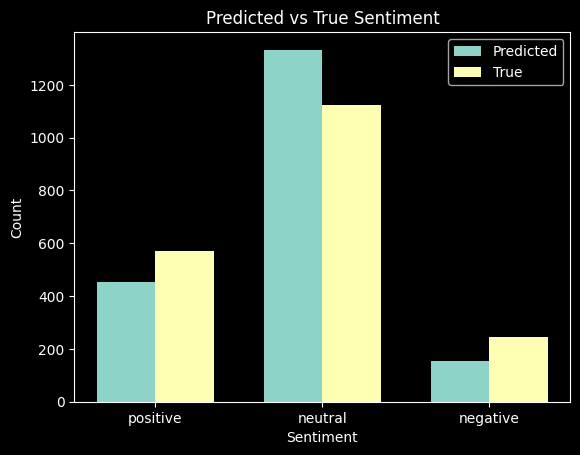

In [ ]:
labels = ['positive', 'neutral', 'negative']

# Convert the predicted and true labels to numeric values
y_pred_numeric = np.array([labels.index(label) for label in a])
y_test_numeric = np.array([labels.index(label) for label in b])

# Count the occurrences of each label in y_pred and y_test
y_pred_counts = np.bincount(y_pred_numeric)
y_test_counts = np.bincount(y_test_numeric)

# Set the bar width
bar_width = 0.35

# Set the x positions for the bars
x = np.arange(len(labels))

# Create the figure and axis objects
fig, ax = plt.subplots()

# Plot the bars for y_pred
ax.bar(x - bar_width/2, y_pred_counts, bar_width, label='Predicted')

# Plot the bars for y_test
ax.bar(x + bar_width/2, y_test_counts, bar_width, label='True')

# Set the labels, title, and legend
ax.set_xlabel('Sentiment')
ax.set_ylabel('Count')
ax.set_title('Predicted vs True Sentiment')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


plt.show()



So far we,have imported the necessary libraries and read the dataset using 'ISO-8859-1' encoding

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Featured examples

</div>

- [NeMo Voice Swap](https://colab.research.google.com/github/NVIDIA/NeMo/blob/stable/tutorials/VoiceSwapSample.ipynb): Use Nvidia's NeMo conversational AI Toolkit to swap a voice in an audio fragment with a computer generated one.

- [Retraining an Image Classifier](https://tensorflow.org/hub/tutorials/tf2_image_retraining): Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- [Text Classification](https://tensorflow.org/hub/tutorials/tf2_text_classification): Classify IMDB movie reviews as either *positive* or *negative*.
- [Style Transfer](https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization): Use deep learning to transfer style between images.
- [Multilingual Universal Sentence Encoder Q&A](https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa): Use a machine learning model to answer questions from the SQuAD dataset.
- [Video Interpolation](https://tensorflow.org/hub/tutorials/tweening_conv3d): Predict what happened in a video between the first and the last frame.
